In [1]:
import pandas as pd
import numpy as np
import dask
import dask.dataframe as dd

/home/ubuntu/.local/lib/python3.8/site-packages/dask/dataframe/utils.py:374: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/home/ubuntu/.local/lib/python3.8/site-packages/dask/dataframe/utils.py:374: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/home/ubuntu/.local/lib/python3.8/site-packages/dask/dataframe/utils.py:374: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


In [2]:
a = pd.read_csv('cc-score-new-1.csv',sep='\t',header=None)

In [3]:
a[['editor','cc']] = pd.DataFrame(a[0].apply(lambda x: x.rsplit(',',1)).to_list())

In [4]:
x = a.drop(columns={0}).set_index('editor')

In [5]:
x['cc'] = x['cc'].astype(float)

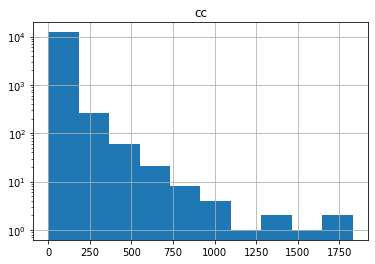

In [6]:
import matplotlib.pyplot as plt
x.hist()
plt.yscale('log')

In [7]:
test = [1000,500,200,100,50,40,30,20,10,1]  

In [8]:
with open("all-kept-editors-by-sig-contrib.txt") as file_in:
    all_editors = []
    for line in file_in:
        all_editors.append(line.rstrip())

In [9]:
print('There are {0} selected editors'.format(len(all_editors)))
for i in test:
    tmp = x[x['cc']>=i]
    print('There are {0} editors with a cc score greater than or equal to {1}'.format(len(tmp),i))

There are 12662 selected editors
There are 7 editors with a cc score greater than or equal to 1000
There are 48 editors with a cc score greater than or equal to 500
There are 313 editors with a cc score greater than or equal to 200
There are 1021 editors with a cc score greater than or equal to 100
There are 2590 editors with a cc score greater than or equal to 50
There are 3348 editors with a cc score greater than or equal to 40
There are 4593 editors with a cc score greater than or equal to 30
There are 6521 editors with a cc score greater than or equal to 20
There are 9688 editors with a cc score greater than or equal to 10
There are 12602 editors with a cc score greater than or equal to 1


In [10]:
res = x[x['cc'] >= 25]

In [11]:
res.to_parquet('/home/ubuntu/xinrui/selected-editors-based-on-cc')

In [2]:
pd.read_parquet('../mount-files/selected-editors-based-on-cc')

,cc
editor,
Mkmcconn,84.315868
Tyrol5,41.326328
Wadewitz,103.459992
LeadSongDog,37.256150
Geographyinitiative,25.898286
...,...
Joao10Siamun,48.792149
Valmir144,217.407343
Dsp13,38.726995
